# Normalized correlation (nodes)

In [1]:
import pandas as pd
import csv

In [6]:
#Retweet Network
path = '../../data/processed/centrality_measures'
path_ltc = '../../data/processed/LTC'

ktz = pd.read_csv(path + '/katz_centrality_1e1.csv')
ltcA = pd.read_csv(path_ltc + '/lt_centrality_alternative.csv')
pgr = pd.read_csv(path + '/page_rank.csv')
deg = pd.read_csv(path + '/degree_centrality.csv')
clos = pd.read_csv(path +'/closseness_centrality.csv')
bet = pd.read_csv(path +'/betweenness_centrality.csv')

In [3]:
#ltc = (ltc - ltc.mean()) / (ltc.max() - ltc.min())

In [8]:
ltc_dict = {}
with open(path_ltc + '/lt_centrality.csv', 'r') as csvfile:
    lineal_threshold = csv.reader(csvfile, delimiter=',')
    for row in lineal_threshold:
        k, v = row
        ltc_dict[k] = v

In [9]:
ltc = pd.DataFrame([[key,value] for key,value in ltc_dict.items()],columns=["node","lineal_threshold"])
ltc['node'] = ltc['node'].convert_objects(convert_numeric=True)
ltc.sort_values('node', inplace = True)
ltc.reset_index(drop=True, inplace = True)
ltc.head()

/home/pablo/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,node,lineal_threshold
0,2,27
1,3,61
2,4,14320
3,5,26
4,6,85


In [10]:
del ltcA['node']
del ltc['node']
del pgr['node']
del deg['node']
del clos['node']
del bet['node']

In [11]:
influence_model = pd.concat([ktz,ltc, ltcA, pgr, deg, clos, bet], axis=1)
influence_model['lineal_threshold'] = influence_model['lineal_threshold'].convert_objects(convert_numeric=True)
influence_model.head()

/home/pablo/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,node,katz_centrality,lineal_threshold,lineal_threshold_alternative,pagerank,degree,closs,betweenness
0,2,0.001769,27,1,0.000003,0.000004,0.000000,0.000000
1,3,0.001769,61,1,0.000003,0.000004,0.000000,0.000000
2,4,0.003088,14320,93,0.000004,0.000320,0.000329,0.000002
3,5,0.001608,26,26,0.000003,0.000094,0.000096,0.000000
4,6,0.001608,85,85,0.000003,0.000324,0.000324,0.000000


In [12]:
# select columns to plot
influence_model = influence_model[['node', 'lineal_threshold', 'katz_centrality', 'pagerank']]

# Normalize lineal_threshold
influence_model['lineal_threshold'] = influence_model['lineal_threshold'].astype(float)
influence_model['lineal_threshold'] = (influence_model['lineal_threshold'] / 256490)

In [13]:
influence_model

,node,lineal_threshold,katz_centrality,pagerank
0,2,0.000105,0.001769,0.000003
1,3,0.000238,0.001769,0.000003
2,4,0.055831,0.003088,0.000004
3,5,0.000101,0.001608,0.000003
4,6,0.000331,0.001608,0.000003
5,7,0.000070,0.001608,0.000003
6,8,0.004012,0.001608,0.000003
7,9,0.004070,0.001962,0.000003
8,10,0.000031,0.001769,0.000004
9,11,0.034321,0.001817,0.000003


In [14]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%pylab inline

pylab.rcParams['figure.figsize'] = (12, 7)

Populating the interactive namespace from numpy and matplotlib


In [17]:
influence_model = influence_model.rename(index=str, columns={"lineal_threshold": "LTR",
                                                             "pagerank": "PageRank",
                                                              "katz_centrality":"Katz centrality"})

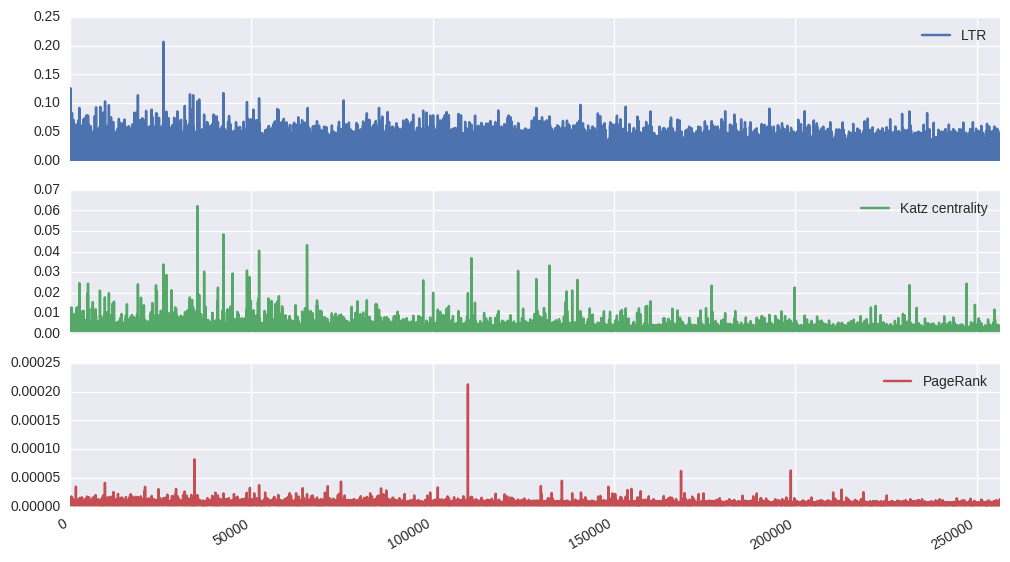

In [18]:
influence_model['node'] = influence_model['node'].astype(str)

_ = influence_model.plot(subplots=True)

In [11]:
#_ = influence_model.plot.bar()

In [12]:
influence_model.corr()

,lineal_threshold,katz_centrality,pagerank
lineal_threshold,1.000000,0.368998,-0.004114
katz_centrality,0.368998,1.000000,0.299347
pagerank,-0.004114,0.299347,1.000000


In [13]:
influence_model.corr(method='spearman')

,lineal_threshold,katz_centrality,pagerank
lineal_threshold,1.000000,0.501715,-0.298902
katz_centrality,0.501715,1.000000,0.387972
pagerank,-0.298902,0.387972,1.000000


In [14]:
influence_model.corr(method='kendall')

,lineal_threshold,katz_centrality,pagerank
lineal_threshold,1.000000,0.380024,-0.335483
katz_centrality,0.380024,1.000000,0.289033
pagerank,-0.335483,0.289033,1.000000
